In [1]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_10532\780980895.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [3]:
world.geom_type[:5]

0    MultiPolygon
1         Polygon
2         Polygon
3    MultiPolygon
4    MultiPolygon
dtype: object

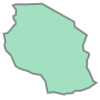

In [4]:
world.geometry[1]

In [6]:
type(world.geometry[1])
print(world.geometry[1])

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.0598199999999451, 37.69868999999994 -3.0969899999999484, 37.7669 -3.6771200000000004, 39.20222 -4.67677, 38.74053999999995 -5.9089499999999475, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.00780999999995, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.098400000000026, 40.316586229110854 -10.317097752817492, 40.31659000000002 -10.317099999999868, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.285202325081656, 37.827639999999974 -11.26878999999991, 37.471289999999954 -11.568759999999997, 36.775150994622805 -11.594537448780805, 36.51408165868426 -11.720938002166735, 35.31239790216904 -11.439146416879147, 34.55998904799935 -11.520020033415925, 34.27999999999997 -10.160000000000025, 33.940837724096525 -9.693673841980285, 33.73972000000009 -9.4171

한반도 찾기

In [8]:
world['name'].isin(['Korea'])

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Name: name, Length: 177, dtype: bool

In [12]:
kor_geom = world[world['name'].isin(['South Korea', 'North Korea'])].geometry
kor_geom

95    MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...
96    POLYGON ((126.17476 37.74969, 126.23734 37.840...
Name: geometry, dtype: geometry

각 국가의 수도 표시

In [13]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_10532\122148680.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [14]:
cities[cities['name'].isin(['Seoul', 'Pyongyang'])]

,name,geometry
154,Pyongyang,POINT (125.75274 39.02138)
194,Seoul,POINT (126.99779 37.56829)


시각화 하기

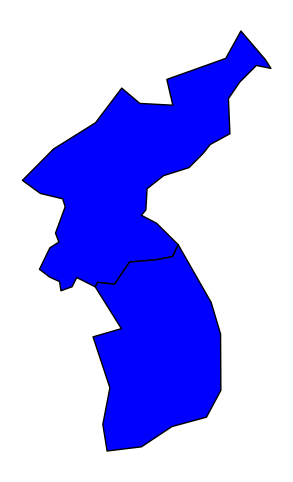

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax = kor_geom.plot(ax=ax, color='blue', edgecolor='black')
ax.set_axis_off()
plt.show()

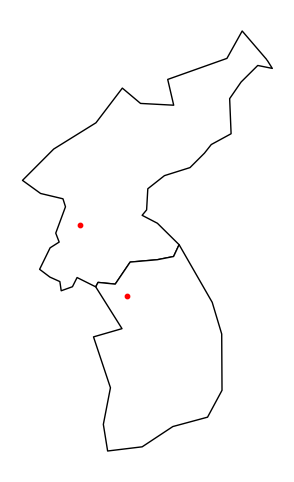

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax = kor_geom.plot(ax=ax, color='white', edgecolor='black')
ax = cities[cities['name'].isin(['Seoul', 'Pyongyang'])].plot(ax=ax, color='red', markersize=10, marker='o')
ax.set_axis_off()
plt.show()